<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday June 15**. Your solutions to theoretical questions should be **done in Markdown/MathJax** directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [217]:
import pandas as pd
import numpy as np
import numpy.random as rand
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 pts] Problem 1

Access the data from URL https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  These data are a subset from a much larger study dealing with child health and development.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html#babies, and a brief summary is given below.

- **bwt**: birth weight (ounces; 999 if unknown) 
- **gestation**: length of pregnancy in days (999 if unknown)
- **parity**: 0=first born, 9=unknown
- **age**: mother's age in years
- **height**: mother's height in inches (99 if unknown)
- **weight**: mother's prepregnancy weight in pounds (999 if unknown)
- **smoke**: smoking status of mother; 0=not now, 1=yes now, 9=unknown

These data are also available on the course Piazza page, under the Resources tab.

In [218]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [219]:
dfBabies = df[df["bwt"] != 999]
dfBabies = dfBabies[dfBabies["gestation"] != 999]
dfBabies = dfBabies[dfBabies["parity"] != 9]
dfBabies = dfBabies[dfBabies["age"] != 999]
dfBabies = dfBabies[dfBabies["height"] != 99]
dfBabies = dfBabies[dfBabies["weight"] != 999]
dfBabies = dfBabies[dfBabies["smoke"] != 9]

print("Number of entries in clean data set: {}".format(len(dfBabies)))

dfBabies.head(10)

Number of entries in clean data set: 1175


,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1
10,140,351,0,27,68,120,0


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

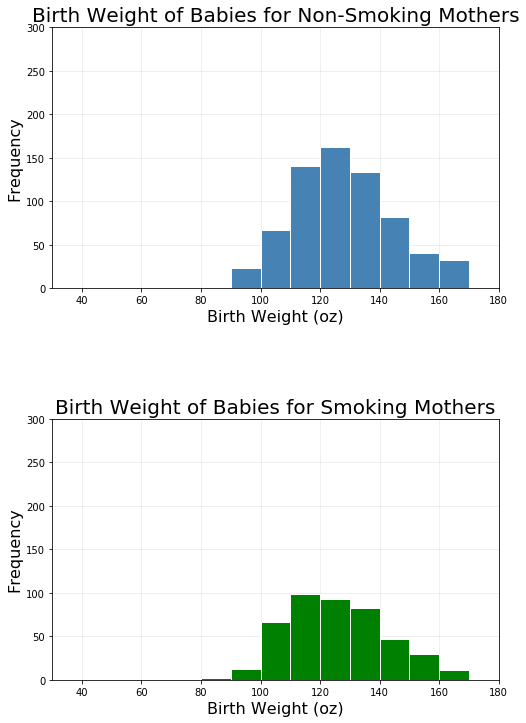

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,12))

my_bins = range(30,180,10)

dfBabiesNoSmoke = dfBabies[dfBabies["smoke"] == 0]
dfBabiesSmoke = dfBabies[dfBabies["smoke"] == 1]

# --------------------------------------
# Plot histogram for Non-Smokers on Top 
# --------------------------------------
dfBabiesNoSmoke.hist(column="weight", ax=axes[0], facecolor="steelblue", edgecolor="white", bins=my_bins)
                                                      
# Add titles and labels 
axes[0].set_title("Birth Weight of Babies for Non-Smoking Mothers", fontsize=20)
axes[0].set_xlabel("Birth Weight (oz)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Smokers on Bottom 
# --------------------------------------
dfBabiesSmoke.hist(column="weight", ax=axes[1], facecolor="green", edgecolor="white", bins=my_bins)
                                                      
# Add titles and labels 
axes[1].set_title("Birth Weight of Babies for Smoking Mothers", fontsize=20)
axes[1].set_xlabel("Birth Weight (oz)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([30,180])
axes[1].set_xlim([30,180])
axes[0].set_ylim([0,300])
axes[1].set_ylim([0,300]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)


**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers.

The mean birth weights for mothers who smoked are slightly lower than non-smoking mothers. Additionally, the distribution of weights among mothers who smoked is more positively skewed than those who did not smoke. The sample size of non-smokers also appears to be larger, sample size being the area of the distribution.

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [221]:
print("Mean weight among smokers: {0:0.3f} oz".format(dfBabiesSmoke["weight"].mean()))
print("Median weight among smokers: {0:0.1f} oz".format(dfBabiesSmoke["weight"].median()))
print("Mean weight among non-smokers: {0:0.3f} oz".format(dfBabiesNoSmoke["weight"].mean()))
print("Median weight among non-smokers: {0:0.1f} oz".format(dfBabiesNoSmoke["weight"].median()))

print("Mean difference: {0:0.3f} oz".format(dfBabiesNoSmoke["weight"].mean() - dfBabiesSmoke["weight"].mean()))
print("Median difference: {0:0.1f} oz".format(dfBabiesNoSmoke["weight"].median() - dfBabiesSmoke["weight"].median()))

Mean weight among smokers: 126.943 oz
Median weight among smokers: 125.0 oz
Mean weight among non-smokers: 129.480 oz
Median weight among non-smokers: 126.0 oz
Mean difference: 2.536 oz
Median difference: 1.0 oz


The mean and median appear to be very similar measures of central tendency in this case. However, the skewness of the smokers distribution means that the mean is slightly affected by the fewer high birth weights, potentially making it not as accurate as the median.

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture, and be sure to label your axes and any relevant components of the plot!

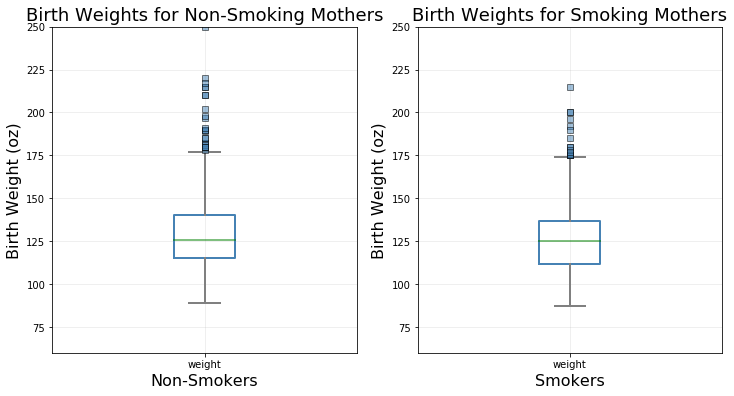

In [222]:
# Initialize figure 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfBabiesNoSmoke.boxplot(column="weight", ax=ax[0], widths=[.2], return_type='dict');
bp1 = dfBabiesSmoke.boxplot(column="weight", ax=ax[1], widths=[.2], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
for box in bp1['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
for whisker in bp1['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
for cap in bp1['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
for cap in bp1['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
for flier in bp1['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax[0].set_title('Birth Weights for Non-Smoking Mothers', fontsize=18)
ax[0].set_ylabel("Birth Weight (oz)", fontsize=16)
ax[0].set_xlabel("Non-Smokers", fontsize=16)
ax[1].set_title('Birth Weights for Smoking Mothers', fontsize=18)
ax[1].set_ylabel("Birth Weight (oz)", fontsize=16)
ax[1].set_xlabel("Smokers", fontsize=16)

# Limits
ax[0].set_ylim([60,250])
ax[1].set_ylim([60,250])

# Make grid-lines lighter
ax[0].grid(alpha=0.25)
ax[1].grid(alpha=0.25)

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

The box and whisker plots show that there are more outliers in the non-smoking data set. All outliers are also on the upper end of the data set. Maybe low end outliers we not recorded or did not survive? In addition, the fliers of each data set reach approximately the same values (about 175 on the high end and 85 on the low). They also show the trend of slightly lower birth weight among smokers.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

In [223]:
four = 28
six = 10
twenty = 2
total = four + six + twenty
p = (four/total)*(0) + (six/total)*(1/6) + (twenty/total)*(1/20) # Law of total probability
print("Probability of 5: {0:0.4f}".format(p))

"""
# Test sim

nSims = 10000
isFive = 0
diceCounts = np.concatenate((np.zeros(four) + 4, np.zeros(six) + 6, np.zeros(twenty) + 20))
for n in range(0, nSims):
    chosenDice = rand.randint(0, len(dice))
    chosenVal = rand.randint(1, dice[chosenDice]+1)
    isFive += (chosenVal == 5)
print(isFive/nSims)
""";

Probability of 5: 0.0442


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

In [224]:
# Bayes' Thm
p5Given6 = 1/6
p6 = six/total
pSixGiven5 = (p5Given6 * p6)/p
print("Probability of Six-Sided Given a 5 is Rolled: {0:0.4f}".format(pSixGiven5))

Probability of Six-Sided Given a 5 is Rolled: 0.9434


**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

No because $P(S \, | \, R_5) \neq P(R_5)$. The $P(S \, | \, R_5) = 0.7937$ while $P(R_5) = 0.0525$. 

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

In [225]:
# Bayes' Thm
pE1GivenF = 1 # Given that you have a 4-sided die, you definitely rolled between 1 and 4
pF = four/total
pE1 = (four/total)*1 + (six/total)*(4/6) + (twenty/total)*(4/20)
pFGivenE1 = (pE1GivenF * pF)/pE1
print("Probability of Four-Sided Given something less than or equal to 4 is Rolled Once: {0:0.4f}".format(pFGivenE1))

Probability of Four-Sided Given something less than or equal to 4 is Rolled Once: 0.7985


**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

In [226]:
# Only pE1 changes
def prob_four(n):
    pEGivenF = 1 # Given that you have a 4-sided die, you definitely rolled between 1 and 4
    pF = four/total
    pEn = (four/total)*1 + (six/total)*((4/6)**n) + (twenty/total)*((4/20)**n)
    return (pEGivenF * pF)/pEn

# Check
n = 1
print("Probability of Four-Sided Given something less than or " + \
      "equal to 4 is Rolled {0:1.0f} time(s): {1:0.4f}".format(n, prob_four(n)))
n = 5
print("Probability of Four-Sided Given something less than or " + \
      "equal to 4 is Rolled {0:1.0f} time(s): {1:0.4f}".format(n, prob_four(n)))

Probability of Four-Sided Given something less than or equal to 4 is Rolled 1 time(s): 0.7985
Probability of Four-Sided Given something less than or equal to 4 is Rolled 5 time(s): 0.9551


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [227]:
for n in range(0, 10):
    print("Probability of Four-Sided Given something less than or " + \
      "equal to 4 is Rolled {0:1.0f} time(s): {1:0.4f}".format(n+1, prob_four(n)))

Probability of Four-Sided Given something less than or equal to 4 is Rolled 1 time(s): 0.7000
Probability of Four-Sided Given something less than or equal to 4 is Rolled 2 time(s): 0.7985
Probability of Four-Sided Given something less than or equal to 4 is Rolled 3 time(s): 0.8609
Probability of Four-Sided Given something less than or equal to 4 is Rolled 4 time(s): 0.9038
Probability of Four-Sided Given something less than or equal to 4 is Rolled 5 time(s): 0.9340
Probability of Four-Sided Given something less than or equal to 4 is Rolled 6 time(s): 0.9551
Probability of Four-Sided Given something less than or equal to 4 is Rolled 7 time(s): 0.9696
Probability of Four-Sided Given something less than or equal to 4 is Rolled 8 time(s): 0.9795
Probability of Four-Sided Given something less than or equal to 4 is Rolled 9 time(s): 0.9863
Probability of Four-Sided Given something less than or equal to 4 is Rolled 10 time(s): 0.9908


Better than 95% chance with 6 rolls in a row $\leq$4. 

***
<a/ id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3

When Chris and Dan leave work in the CU Engineering Center ($E$), they each head for one of five other locations: the Gym to get big ($G$), the Library to get learned ($L$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H$), or to Brewing Market to have a nice Coffee ($C$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Chris and/or Dan is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Chris and Dan, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Chris goes from one place to another is independent of the probability of Dan's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Compute (by hand) the probability that Dan ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

In [228]:
total = 13 # possible combos for 2 moves 
library = 2
print("Probability of Ending up at the Library: {0:0.4f}".format(library/total))

Probability of Ending up at the Library: 0.1538


**Part B**: Compute (by hand) the probability that Chris ends up at the Gym _either_ as his first _or_ second location visited after leaving the Reservsoir. (Again, assume that Chris wanders the streets of Boulder randomly using the same rules described above.)

In [229]:
pFirst = 1/2 # Two choices, one success
pSecond = 1/7 # Seven choices, one success
print("Probability of Ending up at the Gym First or Second: {0:0.4f}".format(pFirst + pSecond))

Probability of Ending up at the Gym First or Second: 0.6429


**Part C**: Suppose that Chris works late at the Engineering Center, while Dan goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above. 
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

In [230]:
p1BothAccessible = 3/4 # Probability Chris even goes to a location that can be reached by both after one move.
p1SameChoice = 1/3 # Probability Dan and Chris choose the same location.
p1 = p1BothAccessible * p1SameChoice # Pt. 1 probability
# Just successess divided by total outcomes. Multiply because both events must happen
p2DanAtHill = 3/11
p2ChrisAtHill = 3/(2+4+4+3)
p2 = p2DanAtHill * p2ChrisAtHill
print("Probability of meeting up after one move: {0:0.4f}".format(p1))
print("Probability of meeting up at hill after two moves: {0:0.4f}".format(p2))

Probability of meeting up after one move: 0.2500
Probability of meeting up at hill after two moves: 0.0629


**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** (both parts of C) are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [231]:
boulder = {
    'G': ['H', 'L', 'E', 'R'],
    'R': ['G', 'E'],
    'H': ['G', 'L', 'C'],
    'L': ['H', 'G', 'E', 'C'],
    'E': ['G', 'R', 'L', 'C'],
    'C': ['H', 'L', 'E']
}
nSims = 10000

# Part A
outcomes = np.zeros(nSims)

for n in range(0,nSims): 
    dan = 'E'
    for move in range(0,2):
        newLocation = rand.randint(0, len(boulder[dan]))
        dan = boulder[dan][newLocation]
    outcomes[n] = (dan == 'L')

print("Ends up at library after 2 moves probability: {0:0.4f}".format(outcomes.mean()))

# Part B
outcomes = np.zeros(nSims)

for n in range(0,nSims): 
    dan = 'R'
    for move in range(0,2):
        newLocation = rand.randint(0, len(boulder[dan]))
        dan = boulder[dan][newLocation]
        outcomes[n] = (dan == 'G') or outcomes[n]
        
print("Ends up going through gym probability: {0:0.4f}".format(outcomes.mean()))

# Part C
outcomes1 = np.zeros(nSims)
outcomes2 = np.zeros(nSims)

for n in range(0,nSims):
    dan = 'H'
    chris = 'E'
    
    # Move 1
    newDanLocation = rand.randint(0, len(boulder[dan]))
    newChrisLocation = rand.randint(0, len(boulder[chris]))
    dan = boulder[dan][newDanLocation]
    chris = boulder[chris][newChrisLocation]
    
    outcomes1[n] = (dan == chris)
    
    # Move 2
    newDanLocation = rand.randint(0, len(boulder[dan]))
    newChrisLocation = rand.randint(0, len(boulder[chris]))
    dan = boulder[dan][newDanLocation]
    chris = boulder[chris][newChrisLocation]
        
    outcomes2[n] = (dan == chris) and (dan == 'H')
    
print("Ends up in same location after one move probability: {0:0.4f}".format(outcomes1.mean()))
print("Ends up in hill after two moves probability: {0:0.4f}".format(outcomes1.mean()))

Ends up at library after 2 moves probability: 0.1459
Ends up going through gym probability: 0.6280
Ends up in same location after one move probability: 0.2588
Ends up in hill after two moves probability: 0.2588


This code creates a graph representing Boulder using a python dictionary. The keys are nodes and the values are their edges. For each part, a variable stores where our protagonist(s) are and they are moved through the graph. For each run of the nSims simulations, the criteria for "success" in that part is checked. If successful, a "1" is stored in the outcomes array such that taking the mean of the array at the end gives the probability.

In Part A, Dan is moved twice and if he is at the library at the end (dan='L'), that is a success.

In Part B, Dan is moved twice this time starting from the reservoir. It is checked if Dan is at the gym for either move.

In Part C, it is checked if Dan and Chris are at the same node after they are each moved once. Then they are moved again. Afterwards it is checked if they are at the same location and that location is the hill.

This is a reasonable approximation of the probability because of the large number of trials, which is far greater that the number of possible outcomes.

***
<a/ id='p4'></a>
[Back to top](#top)

### [30 points] Problem 4


In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [232]:
def draw_card():
    cashout = [50, 100, 200, -50, -100]
    return cashout[rand.randint(0,len(cashout))]

def miniopoly_turn(state, cash):
    
    if cash == 0: return state, cash
    
    roll1 = rand.randint(1,7) # Get roll 1
    roll2 = rand.randint(1,7) # Get roll 2
    
    total = roll1 + roll2
    
    if state != 30:
        new_state = state + total
        new_cash = cash

        if new_state > 40: 
            new_state -= 40
            new_cash += 200

        if new_state in [2, 7, 17, 22, 33, 36]:
            new_cash += draw_card()
        elif new_state in [0, 10, 20]:
            pass
        elif new_state == 30: # jail
            pass
        else:
            new_cash -= new_state
        
        state = new_state
        cash = new_cash
    else:
        if roll1 == roll2:
            state = 10 + total
        else:
            cash -= 20
    
    if cash < 0: cash = 0
    
    return state, cash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. Be sure to label your axes!

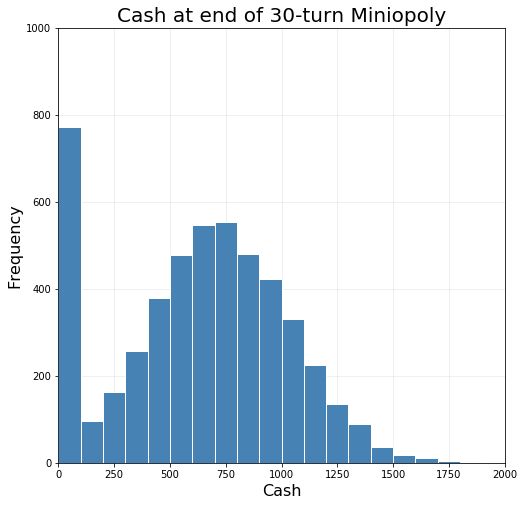

In [233]:
nSims = 5000
cash_arr = np.zeros(nSims)
jail_arr = np.zeros(nSims)

for n in range(0,nSims):
    state = 1
    cash = 200
    for turn in range(0, 30):
        state, cash = miniopoly_turn(state, cash)
    cash_arr[n] = cash
    if state == 30: jail_arr[n] = 1
    
df_dic = {'cash': cash_arr, 'jail': jail_arr}
df = pd.DataFrame(df_dic)
fig, axes = plt.subplots(figsize=(8,8))

my_bins = range(0,2000,100)

df.hist(column="cash", ax=axes, facecolor="steelblue", edgecolor="white", bins=my_bins)
                                                      
# Add titles and labels 
axes.set_title("Cash at end of 30-turn Miniopoly", fontsize=20)
axes.set_xlabel("Cash", fontsize=16)
axes.set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes.grid(alpha=0.25)
axes.set_axisbelow(True)

# Set x and y axis limits 
axes.set_xlim([0,2000])
axes.set_ylim([0,1000]);

**Part C**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [234]:
print("P(Bankrupt in 30 turns or less) = {}".format(len(df[df["cash"] == 0])/nSims))

P(Bankrupt in 30 turns or less) = 0.1444


**Part D**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [235]:
broke_n_booked = len(df.loc[(df["jail"] == 1) & (df["cash"] == 0)])
just_booked = len(df.loc[df["jail"] == 1])
print("P(Bankrupt in 30 turns or less | Went to Jail) = {}".format(broke_n_booked/just_booked))

P(Bankrupt in 30 turns or less | Went to Jail) = 0.288622754491018


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [236]:
just_broke = len(df[df["cash"] == 0])
print("P(Went to Jail | Bankrupt in 30 turns or less) = {}".format(broke_n_booked/just_broke))

P(Went to Jail | Bankrupt in 30 turns or less) = 0.3337950138504155
